In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import scipy.stats as stats

In [2]:
df=pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\bank marketing\bank\bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
#pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\bank marketing\bank\bank-full.csv',sep=';')

In [4]:
#pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\bank marketing\bank-additional\bank-additional\bank-additional.csv',sep=';')

# bank additional:
 Input variables:
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   # related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

# bank.csv datadescription:
Input variables:
  
  # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric)
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# no null value so the above data ready of analysis.

In [7]:
df1= df[df['balance'] > 0]
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
df2=df[df['balance']<0]
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
48,32,entrepreneur,single,primary,yes,-849,yes,yes,cellular,4,feb,204,1,-1,0,unknown,no
60,41,blue-collar,married,primary,no,-516,no,yes,telephone,8,jul,554,3,-1,0,unknown,no
92,27,services,single,secondary,no,-195,yes,no,cellular,18,may,391,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,44,blue-collar,married,primary,no,-237,yes,no,telephone,10,jul,73,1,-1,0,unknown,no
4502,42,services,married,secondary,no,-91,yes,yes,cellular,5,feb,43,1,-1,0,unknown,no
4506,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no


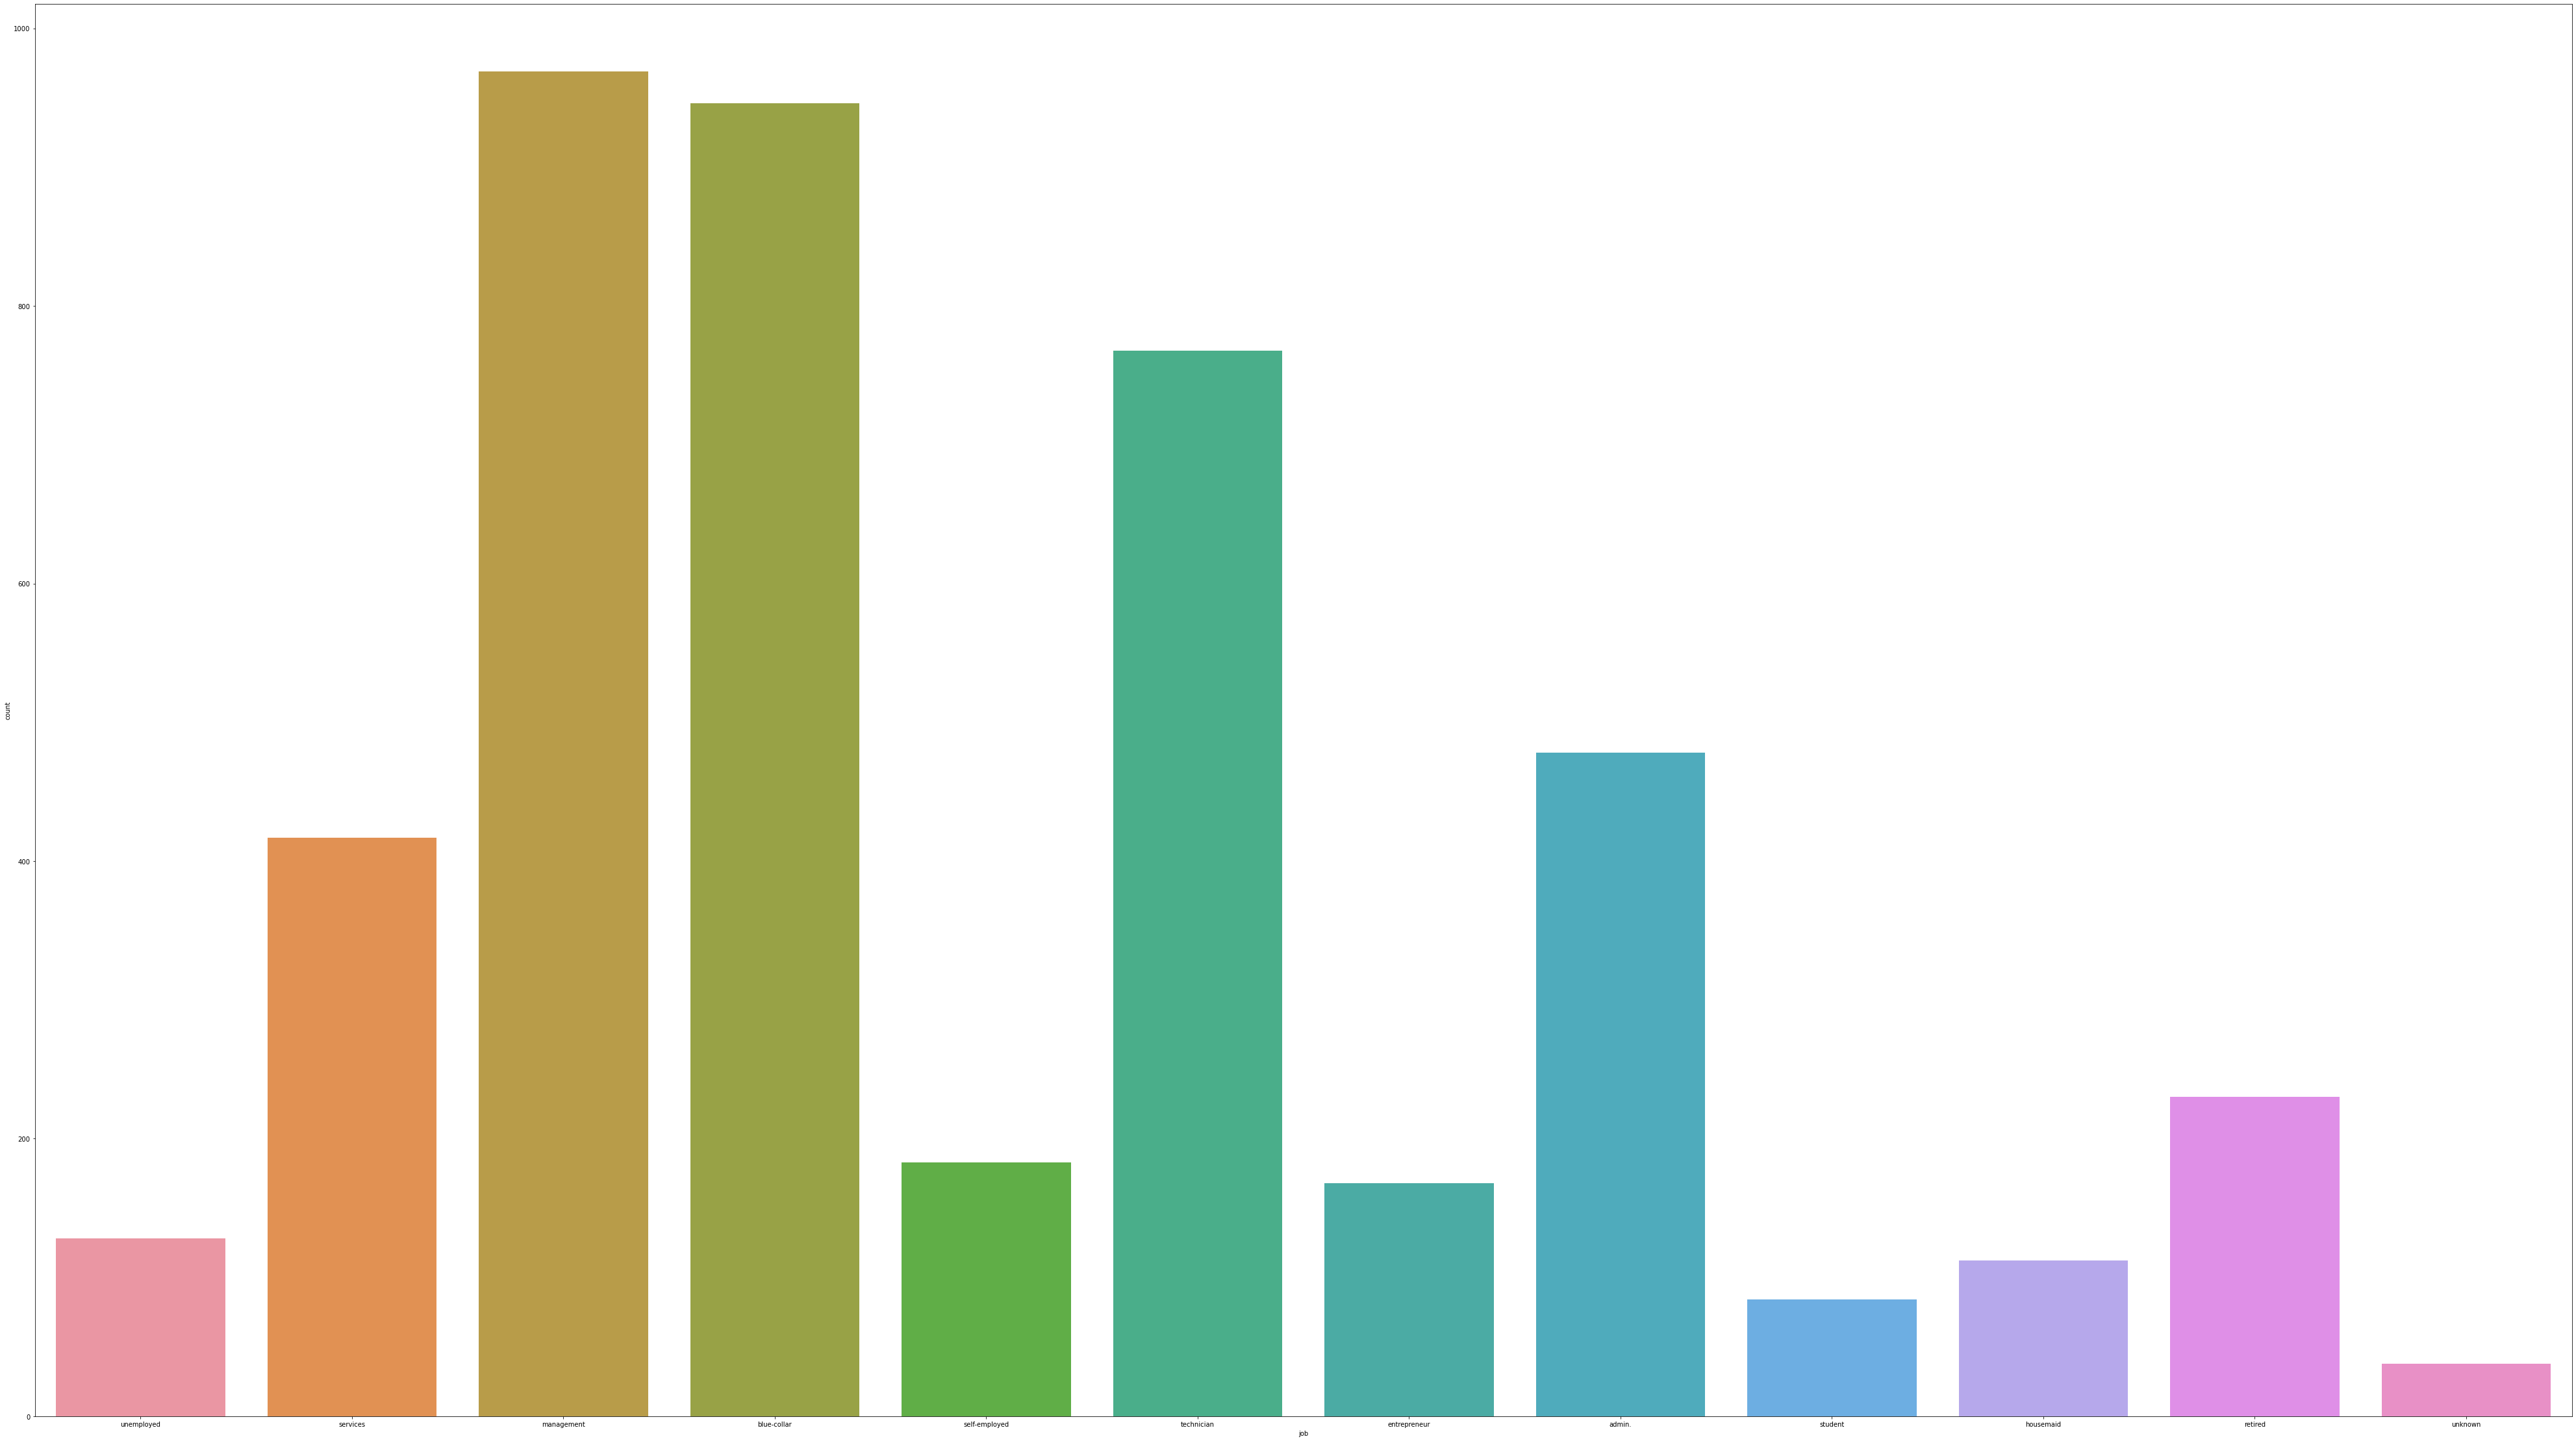

In [9]:
fig=plt.figure(figsize=(70,40))
sns.countplot(x=df['job'])
plt.rcParams.update({'font.size': 50},)

In [10]:
campaign_result = df.groupby(['campaign','y']).size().reset_index()
campaign_result

,campaign,y,0
0,1,no,1494
1,1,yes,240
2,2,no,1126
3,2,yes,138
4,3,no,501
5,3,yes,57
6,4,no,282
7,4,yes,43
8,5,no,158
9,5,yes,9


<AxesSubplot:xlabel='y', ylabel='campaign'>

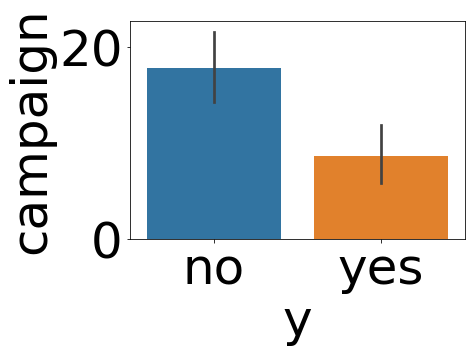

In [11]:
sns.barplot(y='campaign',x='y',data=campaign_result)

# observation: campaign has less effect to convince people for deposits

In [12]:
df_yes= df[df['y']=='yes']
df_yes 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


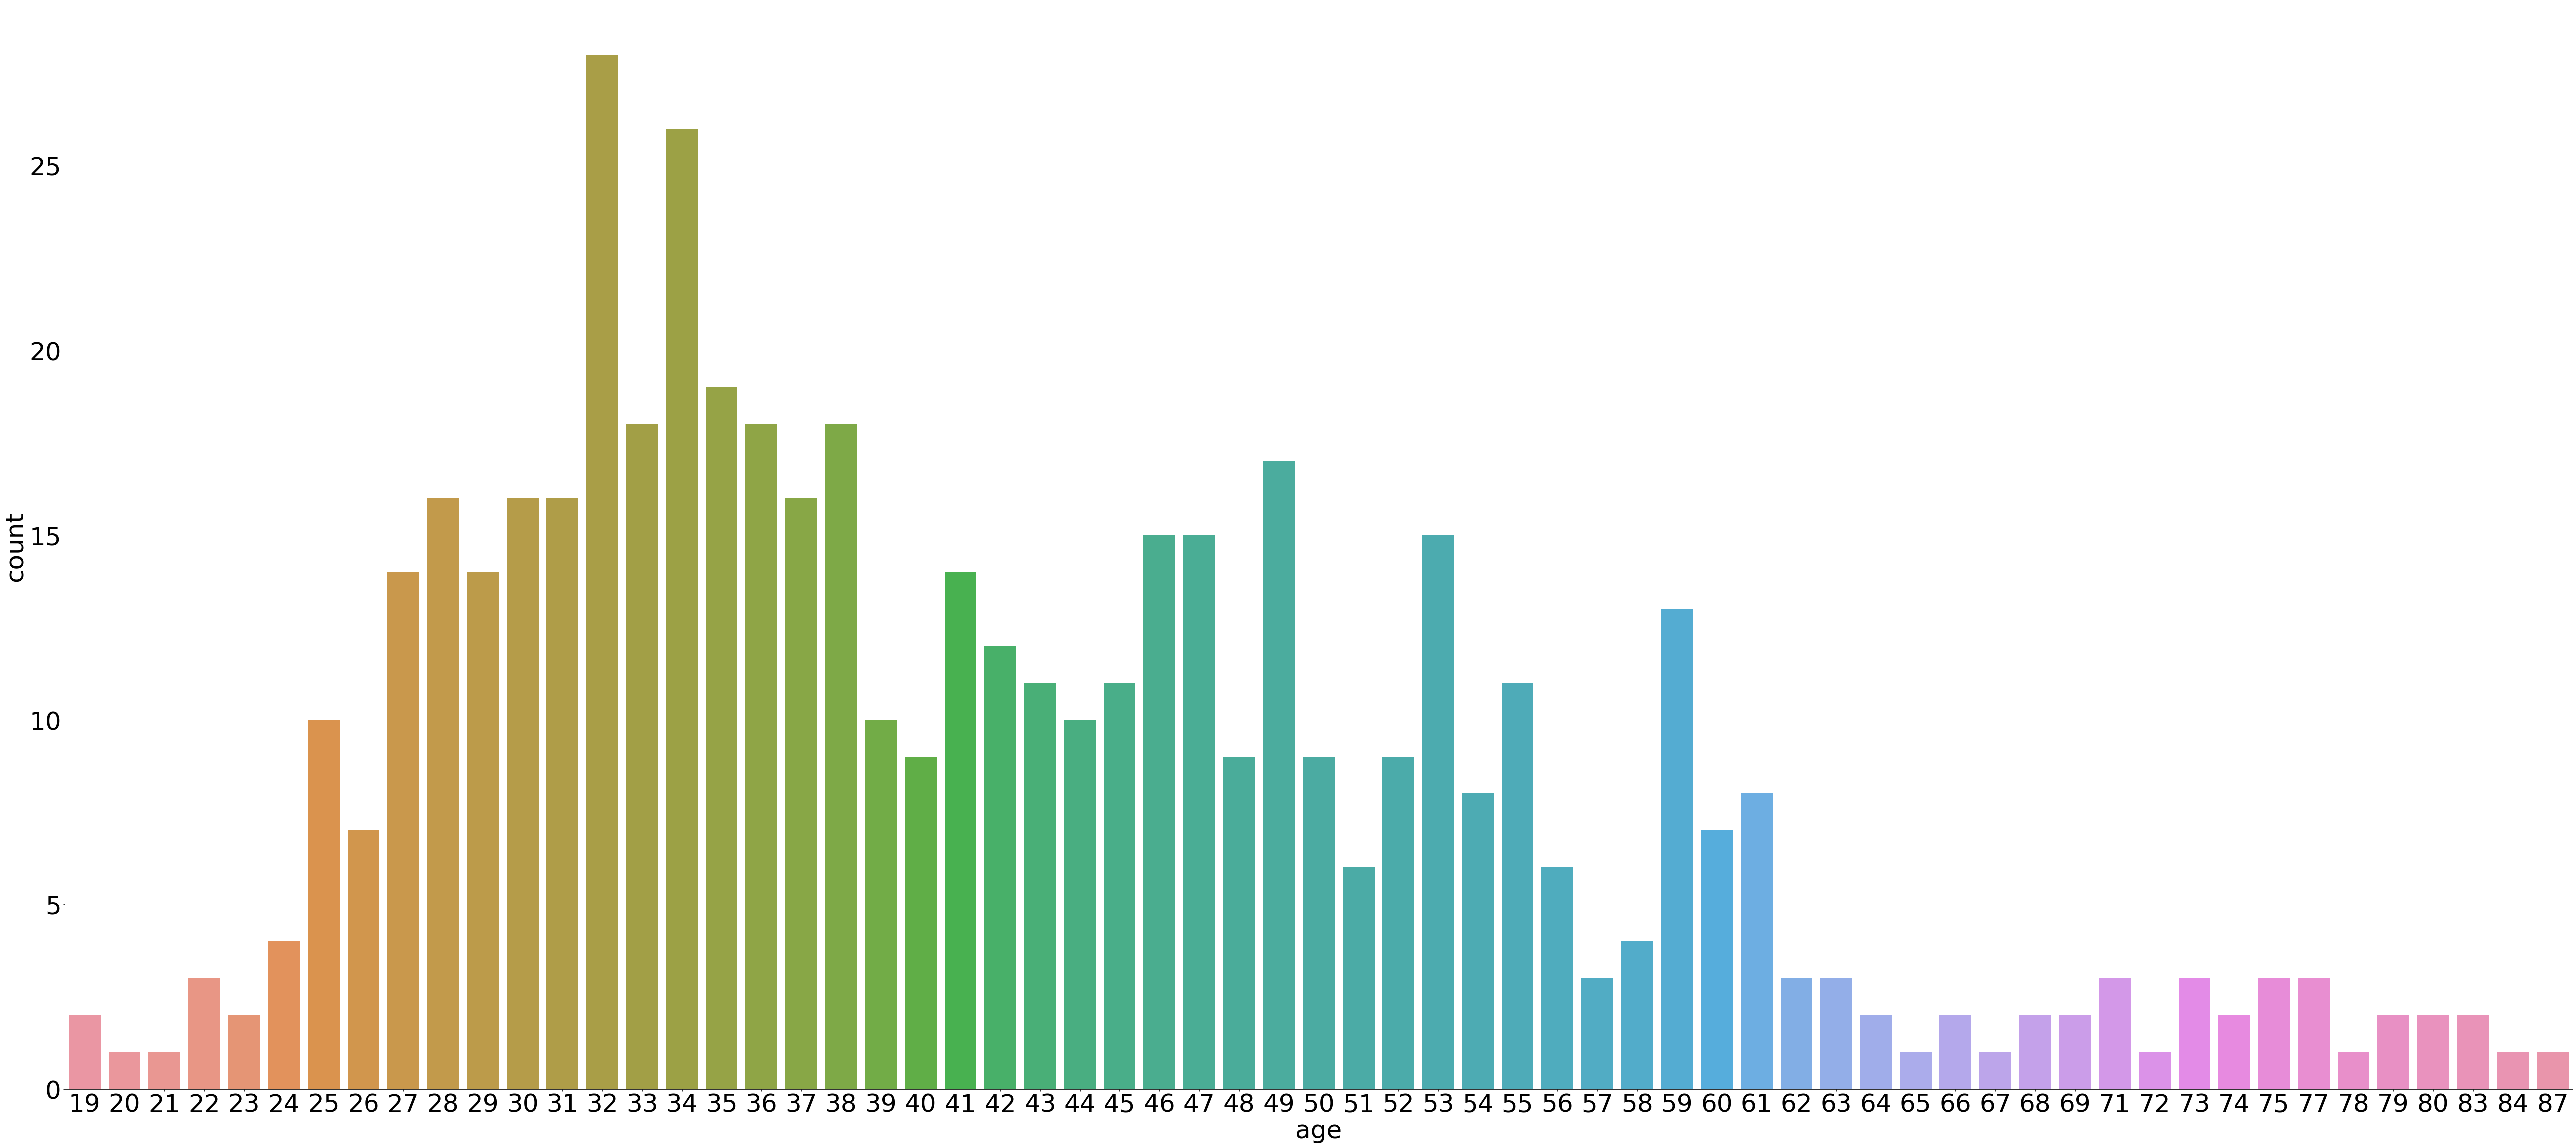

In [13]:
fig=plt.figure(figsize=(90,40))
sns.countplot(x='age',data=df_yes)
plt.rcParams.update({'font.size': 50},)

# observation: age group is 24-61, who are our positive outcomes

In [14]:
age_sum = df_yes['age'].value_counts().sort_index(ascending=True).to_frame()
age_sum

,age
19,2
20,1
21,1
22,3
23,2
...,...
79,2
80,2
83,2
84,1


In [15]:
df_yes['age'].value_counts().values

array([28, 26, 19, 18, 18, 18, 17, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14,
       13, 12, 11, 11, 11, 10, 10, 10,  9,  9,  9,  9,  8,  8,  7,  7,  6,
        6,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [16]:
df_yes['age'].value_counts().index

Int64Index([32, 34, 35, 36, 33, 38, 49, 30, 37, 31, 28, 53, 46, 47, 29, 41, 27,
            59, 42, 55, 43, 45, 25, 39, 44, 52, 50, 48, 40, 61, 54, 26, 60, 56,
            51, 24, 58, 71, 75, 77, 73, 63, 57, 62, 22, 68, 66, 23, 74, 80, 64,
            83, 19, 69, 79, 84, 87, 20, 72, 67, 21, 78, 65],
           dtype='int64')

In [17]:
age_sum=age_sum.reset_index()
age_sum

,index,age
0,19,2
1,20,1
2,21,1
3,22,3
4,23,2
...,...,...
58,79,2
59,80,2
60,83,2
61,84,1


# percentage of age group have positive outcome:-

In [18]:
for i,j in zip(age_sum['index'],age_sum['age']):
    percentage=np.round((j/df_yes.shape[0])*100,1)
    print([i,percentage],end='')

[19, 0.4][20, 0.2][21, 0.2][22, 0.6][23, 0.4][24, 0.8][25, 1.9][26, 1.3][27, 2.7][28, 3.1][29, 2.7][30, 3.1][31, 3.1][32, 5.4][33, 3.5][34, 5.0][35, 3.6][36, 3.5][37, 3.1][38, 3.5][39, 1.9][40, 1.7][41, 2.7][42, 2.3][43, 2.1][44, 1.9][45, 2.1][46, 2.9][47, 2.9][48, 1.7][49, 3.3][50, 1.7][51, 1.2][52, 1.7][53, 2.9][54, 1.5][55, 2.1][56, 1.2][57, 0.6][58, 0.8][59, 2.5][60, 1.3][61, 1.5][62, 0.6][63, 0.6][64, 0.4][65, 0.2][66, 0.4][67, 0.2][68, 0.4][69, 0.4][71, 0.6][72, 0.2][73, 0.6][74, 0.4][75, 0.6][77, 0.6][78, 0.2][79, 0.4][80, 0.4][83, 0.4][84, 0.2][87, 0.2]

# observation: age group of 27-41 is the range where more campaigns should concentrate on

In [19]:
for i in df_yes['age'].value_counts():
    percentage=np.round((i/521)*100,1)
    print(percentage,end='; ')

5.4; 5.0; 3.6; 3.5; 3.5; 3.5; 3.3; 3.1; 3.1; 3.1; 3.1; 2.9; 2.9; 2.9; 2.7; 2.7; 2.7; 2.5; 2.3; 2.1; 2.1; 2.1; 1.9; 1.9; 1.9; 1.7; 1.7; 1.7; 1.7; 1.5; 1.5; 1.3; 1.3; 1.2; 1.2; 0.8; 0.8; 0.6; 0.6; 0.6; 0.6; 0.6; 0.6; 0.6; 0.6; 0.4; 0.4; 0.4; 0.4; 0.4; 0.4; 0.4; 0.4; 0.4; 0.4; 0.2; 0.2; 0.2; 0.2; 0.2; 0.2; 0.2; 0.2; 

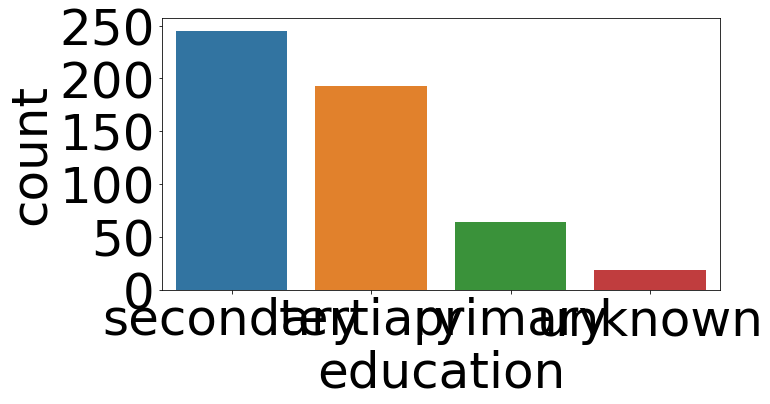

In [20]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x=df_yes['education'])
plt.rcParams.update({'font.size':20},)

<AxesSubplot:xlabel='contact', ylabel='count'>

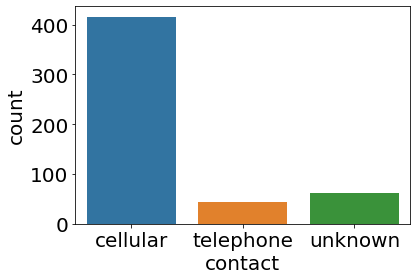

In [21]:
sns.countplot(x=df_yes['contact'])

# observations: cellular contact has more impact on customers

# FEATURE SCALING


In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['y']= label_encoder.fit_transform(df['y'])
df['month']= label_encoder.fit_transform(df['month'])
df['marital']= label_encoder.fit_transform(df['marital'])

In [24]:
#pd.get_dummies(df,columns=['marital'])

In [25]:
df    # this is our final data for developing a model

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [26]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


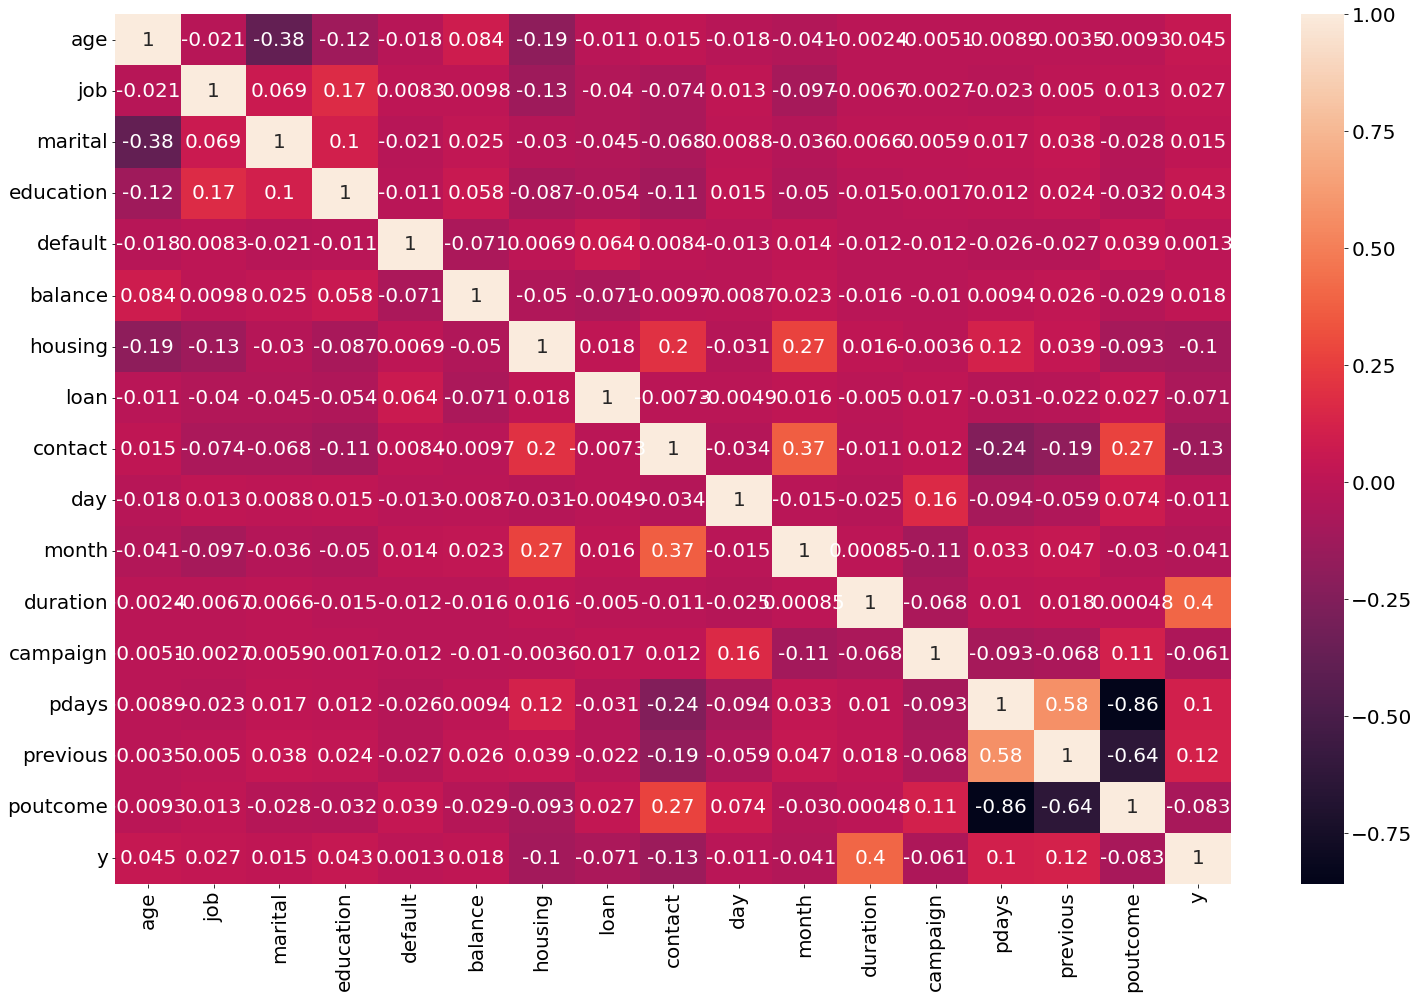

In [27]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [28]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [29]:
df = df.drop(columns=['default','pdays','previous'])

In [30]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,1137,0,0,0,6,3,129,4,1,0


# as poutcome has corelation with pdays,previous so dropped the data
# default feature has no impact for developing the model

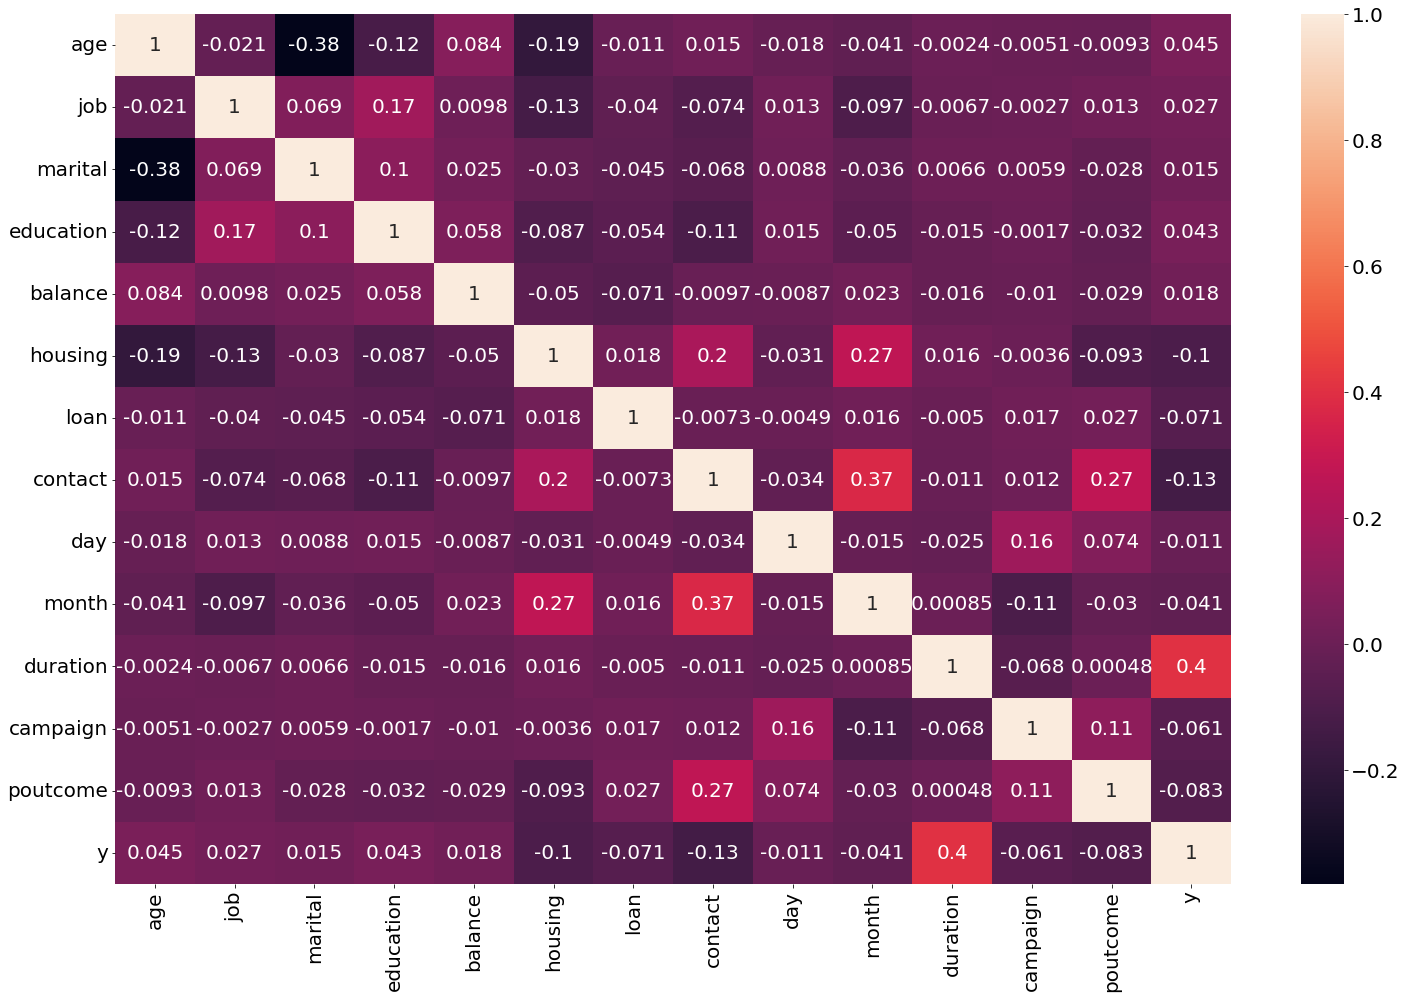

In [31]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [32]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,1137,0,0,0,6,3,129,4,1,0


In [33]:
X=df.iloc[:,1:13]
y=df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)


In [ ]:
print(log_regressor.best_params_)

In [ ]:
print(log_regressor.best_score_)

In [ ]:
prediction_log=log_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_test,prediction_log)

In [ ]:
f1_score(y_test,prediction_log)